In [1]:
!matplotlib inline
import math, time, random, datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

/bin/bash: matplotlib: command not found


In [2]:
# Import train & test data 
train = pd.read_csv('/home/jcolewrld/titanic/train.csv')
test = pd.read_csv('/home/jcolewrld/titanic/test.csv')
gender_submission = pd.read_csv('/home/jcolewrld/titanic/gender_submission.csv') # example of what a submission should look like

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:ylabel='Frequency'>

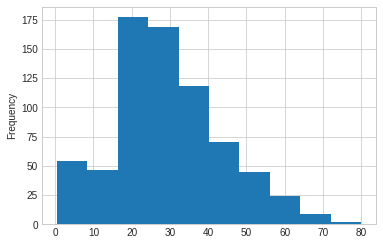

In [4]:
train.Age.plot.hist()

In [5]:
# View the example submisison dataframe
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
len(train)

891

In [8]:
len(test)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

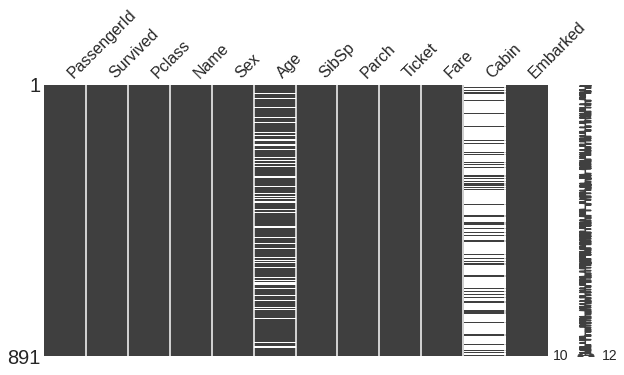

In [10]:
missingno.matrix(train, figsize = (10,5))

In [11]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

In [12]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0    549
1    342
Name: Survived, dtype: int64


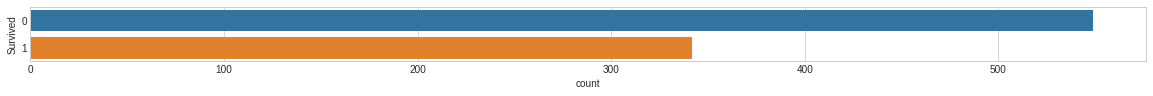

In [14]:
# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [15]:
# Let's add this to our subset dataframes
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [16]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


## Feature: Pclass
Description: The ticket class of the passenger.

Key: 1 = 1st, 2 = 2nd, 3 = 3rd

#### Let's plot the distribution
We will look at the distribution of each feature first if we can to understand what kind of spread there is across the dataset.

For example, if there are values which are completely outside of the distribution, we may not want to include them in our model.

/home/jcolewrld/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

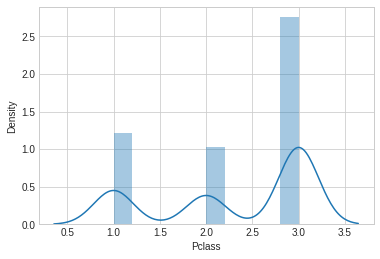

In [17]:
sns.distplot(train.Pclass)

In [18]:
train.isnull().sum(0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

In [20]:
# How many different names are there?
train.Name.value_counts()

McCoy, Mr. Bernard                                           1
Bishop, Mr. Dickinson H                                      1
Richards, Master. William Rowe                               1
Honkanen, Miss. Eliina                                       1
Beane, Mrs. Edward (Ethel Clarke)                            1
                                                            ..
Kantor, Mr. Sinai                                            1
Alhomaki, Mr. Ilmari Rudolf                                  1
Davies, Mr. Charles Henry                                    1
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)    1
Daniel, Mr. Robert Williams                                  1
Name: Name, Length: 891, dtype: int64

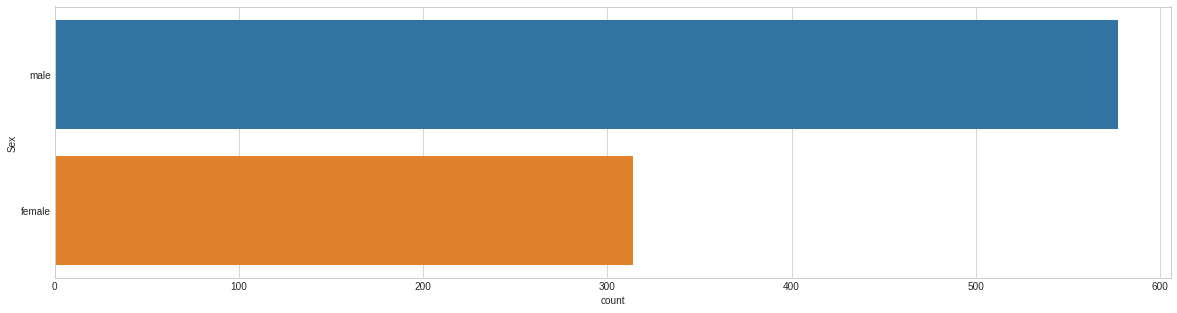

In [21]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=train);

In [22]:

# add Sex to the subset dataframes
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) # change sex to 0 for male and 1 for female

df_con['Sex'] = train['Sex']

/home/jcolewrld/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jcolewrld/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


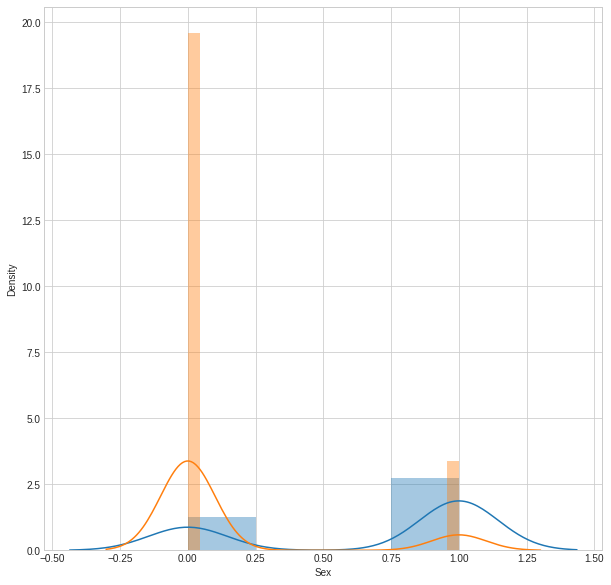

In [23]:
# How does the Sex variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});


In [24]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

In [25]:
train.Age.isnull().sum()

177

In [26]:
# Once the Age values have been fixed up, we can add them to our sub dataframes.
# df_bin['Age'] = pd.cut(train['Age'], 10) # bucketed/binned into different categories
# df_con['Age'] = train['Age'] # non-bucketed

In [27]:

# How many missing values does SibSp have?
train.SibSp.isnull().sum()

0

In [28]:
# What values are there?
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [29]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

/home/jcolewrld/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jcolewrld/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


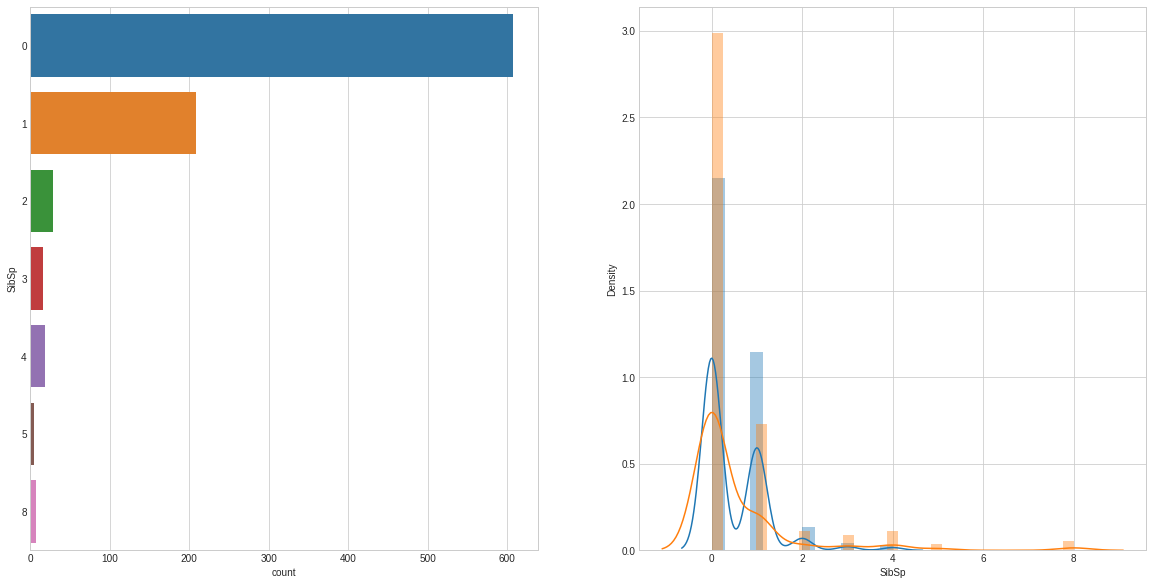

In [30]:
# Visualise the counts of SibSp and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

In [31]:
# How many missing values does Parch have?
train.Parch.isnull().sum()

0

In [32]:
# What values are there?
train.Parch.value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [33]:
# Add Parch to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

/home/jcolewrld/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jcolewrld/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


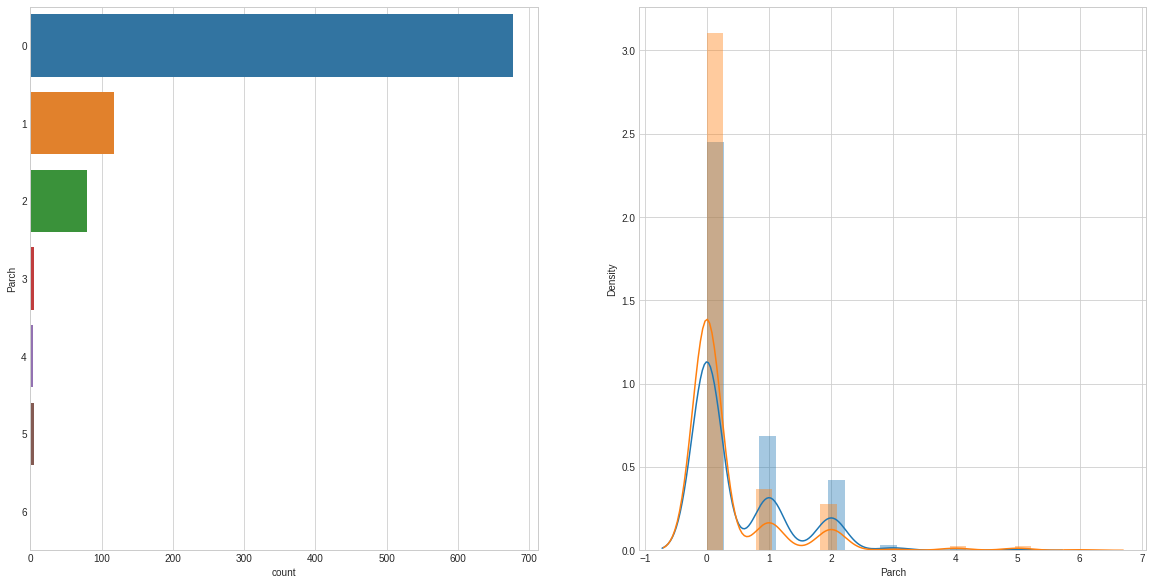

In [34]:
# Visualise the counts of Parch and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


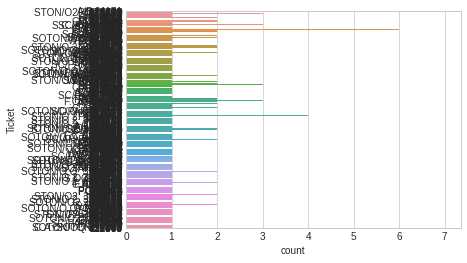

In [37]:
# How many kinds of ticket are there?
sns.countplot(y="Ticket", data=train);

In [38]:
# How many kinds of ticket are there?
train.Ticket.value_counts()

1601        7
347082      7
CA. 2343    7
347088      6
CA 2144     6
           ..
PC 17595    1
345778      1
371362      1
8471        1
2694        1
Name: Ticket, Length: 681, dtype: int64

In [39]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

There are 681 unique Ticket values.


In [40]:
# How many missing values does Fare have?
train.Fare.isnull().sum()

0

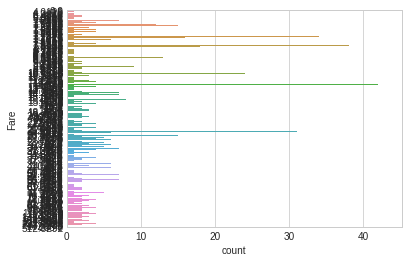

In [41]:
# How many different values of Fare are there?
sns.countplot(y="Fare", data=train);

In [42]:
# How many unique kinds of Fare are there?
print("There are {} unique Fare values.".format(len(train.Fare.unique())))

There are 248 unique Fare values.


In [43]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised

In [44]:
# What do our Fare bins look like?
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

/home/jcolewrld/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jcolewrld/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


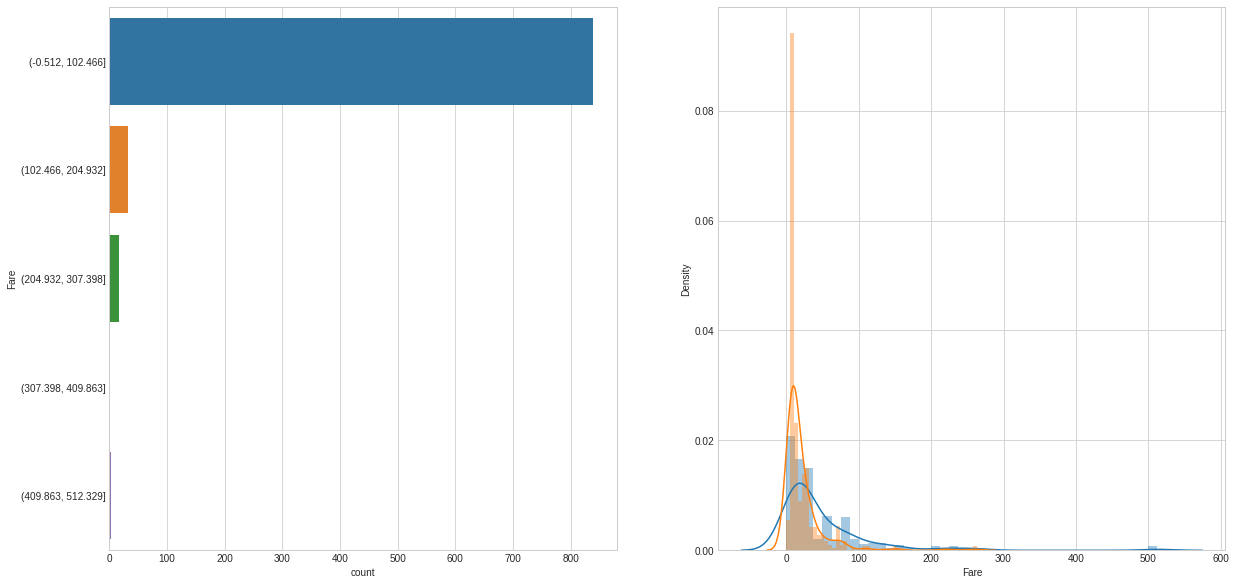

In [45]:

# Visualise the Fare bin counts as well as the Fare distribution versus Survived.
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

In [46]:

# How many missing values does Cabin have?
train.Cabin.isnull().sum()

687

In [47]:
# What do the Cabin values look like?
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
F2             3
              ..
A20            1
E63            1
B73            1
C91            1
C50            1
Name: Cabin, Length: 147, dtype: int64

In [48]:
# How many missing values does Embarked have?
train.Embarked.isnull().sum()

2

In [49]:
# What kind of values are in Embarked?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

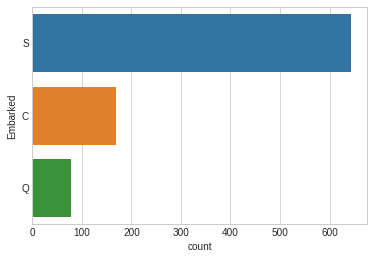

In [50]:
# What do the counts look like?
sns.countplot(y='Embarked', data=train);

In [51]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [52]:
# Remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


In [53]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [54]:
df_con.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
5,0,3,male,0,0,8.4583,Q
6,0,1,male,0,0,51.8625,S
7,0,3,male,3,1,21.0750,S
8,1,3,female,0,2,11.1333,S
9,1,2,female,1,0,30.0708,C


In [55]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [56]:

# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [57]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [58]:
df_con_enc.head(20)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,1,0,30.0708,1,0,0,1,0,0,1,0


In [59]:
# Seclect the dataframe we want to use first for predictions
selected_df = df_con_enc

In [60]:
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [61]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [62]:
# Shape of the data (without labels)
X_train.shape


(889, 11)

In [63]:
#Data
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [64]:
# Shape of the labels
y_train.shape

(889,)

In [65]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [67]:

# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.46
Accuracy CV 10-Fold: 76.72
Running Time: 0:00:01.764165


In [68]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))


Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.534796


In [69]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 77.62
Accuracy CV 10-Fold: 77.5
Running Time: 0:00:00.088029


/home/jcolewrld/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [70]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 74.69
Accuracy CV 10-Fold: 68.73
Running Time: 0:00:00.046962


In [71]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.43
Running Time: 0:00:00.045709


In [72]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.61
Accuracy CV 10-Fold: 80.65
Running Time: 0:00:00.259021


In [73]:
# View the data for the CatBoost model
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [74]:
# View the labels for the CatBoost model
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [75]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features


array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10])

In [76]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [77]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

Learning rate set to 0.009797


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6862830	total: 48.2ms	remaining: 48.2s
1:	learn: 0.6809444	total: 49.3ms	remaining: 24.6s
2:	learn: 0.6751692	total: 50.6ms	remaining: 16.8s
3:	learn: 0.6689060	total: 51.9ms	remaining: 12.9s
4:	learn: 0.6632144	total: 53.3ms	remaining: 10.6s
5:	learn: 0.6576488	total: 58.4ms	remaining: 9.68s
6:	learn: 0.6544441	total: 59.1ms	remaining: 8.39s
7:	learn: 0.6490635	total: 60.7ms	remaining: 7.53s
8:	learn: 0.6443241	total: 62.8ms	remaining: 6.91s
9:	learn: 0.6395935	total: 64.1ms	remaining: 6.35s
10:	learn: 0.6345186	total: 65.1ms	remaining: 5.85s
11:	learn: 0.6305316	total: 66.5ms	remaining: 5.47s
12:	learn: 0.6275610	total: 67.1ms	remaining: 5.09s
13:	learn: 0.6225020	total: 68.3ms	remaining: 4.81s
14:	learn: 0.6179503	total: 69.7ms	remaining: 4.58s
15:	learn: 0.6140480	total: 70.4ms	remaining: 4.33s
16:	learn: 0.6100034	total: 71.3ms	remaining: 4.13s
17:	learn: 0.6049646	total: 72.9ms	remaining: 3.98s
18:	learn: 0.6025760	total: 73.5ms	remaining: 3.79s
19:	learn: 0.5998630	t

278:	learn: 0.3981401	total: 374ms	remaining: 967ms
279:	learn: 0.3980249	total: 375ms	remaining: 966ms
280:	learn: 0.3980232	total: 376ms	remaining: 962ms
281:	learn: 0.3978097	total: 377ms	remaining: 960ms
282:	learn: 0.3975589	total: 378ms	remaining: 959ms
283:	learn: 0.3974342	total: 379ms	remaining: 957ms
284:	learn: 0.3973722	total: 380ms	remaining: 954ms
285:	learn: 0.3970671	total: 382ms	remaining: 953ms
286:	learn: 0.3967993	total: 384ms	remaining: 953ms
287:	learn: 0.3967561	total: 385ms	remaining: 951ms
288:	learn: 0.3966435	total: 386ms	remaining: 950ms
289:	learn: 0.3965604	total: 387ms	remaining: 948ms
290:	learn: 0.3965537	total: 388ms	remaining: 945ms
291:	learn: 0.3964798	total: 389ms	remaining: 943ms
292:	learn: 0.3963696	total: 390ms	remaining: 941ms
293:	learn: 0.3962791	total: 391ms	remaining: 939ms
294:	learn: 0.3960749	total: 392ms	remaining: 938ms
295:	learn: 0.3960421	total: 393ms	remaining: 936ms
296:	learn: 0.3958328	total: 394ms	remaining: 934ms
297:	learn: 

453:	learn: 0.3804932	total: 561ms	remaining: 675ms
454:	learn: 0.3804430	total: 564ms	remaining: 675ms
455:	learn: 0.3803859	total: 565ms	remaining: 674ms
456:	learn: 0.3803687	total: 566ms	remaining: 673ms
457:	learn: 0.3801930	total: 568ms	remaining: 672ms
458:	learn: 0.3801130	total: 569ms	remaining: 671ms
459:	learn: 0.3798434	total: 570ms	remaining: 669ms
460:	learn: 0.3798298	total: 571ms	remaining: 668ms
461:	learn: 0.3796352	total: 576ms	remaining: 670ms
462:	learn: 0.3795602	total: 577ms	remaining: 669ms
463:	learn: 0.3794893	total: 578ms	remaining: 668ms
464:	learn: 0.3792402	total: 579ms	remaining: 666ms
465:	learn: 0.3792293	total: 580ms	remaining: 665ms
466:	learn: 0.3791163	total: 581ms	remaining: 664ms
467:	learn: 0.3790884	total: 583ms	remaining: 663ms
468:	learn: 0.3790051	total: 584ms	remaining: 662ms
469:	learn: 0.3788248	total: 585ms	remaining: 660ms
470:	learn: 0.3788226	total: 586ms	remaining: 658ms
471:	learn: 0.3787820	total: 587ms	remaining: 657ms
472:	learn: 

618:	learn: 0.3674936	total: 750ms	remaining: 462ms
619:	learn: 0.3674703	total: 751ms	remaining: 460ms
620:	learn: 0.3674295	total: 752ms	remaining: 459ms
621:	learn: 0.3674261	total: 753ms	remaining: 457ms
622:	learn: 0.3673472	total: 755ms	remaining: 457ms
623:	learn: 0.3672394	total: 756ms	remaining: 455ms
624:	learn: 0.3671017	total: 757ms	remaining: 454ms
625:	learn: 0.3669262	total: 758ms	remaining: 453ms
626:	learn: 0.3668421	total: 759ms	remaining: 452ms
627:	learn: 0.3667561	total: 760ms	remaining: 450ms
628:	learn: 0.3667090	total: 763ms	remaining: 450ms
629:	learn: 0.3666052	total: 764ms	remaining: 448ms
630:	learn: 0.3665458	total: 765ms	remaining: 447ms
631:	learn: 0.3665288	total: 766ms	remaining: 446ms
632:	learn: 0.3663299	total: 768ms	remaining: 445ms
633:	learn: 0.3662989	total: 770ms	remaining: 444ms
634:	learn: 0.3660778	total: 771ms	remaining: 443ms
635:	learn: 0.3660162	total: 772ms	remaining: 442ms
636:	learn: 0.3659403	total: 774ms	remaining: 441ms
637:	learn: 

784:	learn: 0.3557393	total: 937ms	remaining: 257ms
785:	learn: 0.3557326	total: 938ms	remaining: 255ms
786:	learn: 0.3555509	total: 958ms	remaining: 259ms
787:	learn: 0.3554902	total: 959ms	remaining: 258ms
788:	learn: 0.3554292	total: 960ms	remaining: 257ms
789:	learn: 0.3553073	total: 962ms	remaining: 256ms
790:	learn: 0.3552256	total: 963ms	remaining: 254ms
791:	learn: 0.3551266	total: 964ms	remaining: 253ms
792:	learn: 0.3551152	total: 965ms	remaining: 252ms
793:	learn: 0.3549248	total: 966ms	remaining: 251ms
794:	learn: 0.3547883	total: 967ms	remaining: 249ms
795:	learn: 0.3547743	total: 969ms	remaining: 248ms
796:	learn: 0.3546507	total: 970ms	remaining: 247ms
797:	learn: 0.3546089	total: 972ms	remaining: 246ms
798:	learn: 0.3546032	total: 972ms	remaining: 245ms
799:	learn: 0.3545900	total: 973ms	remaining: 243ms
800:	learn: 0.3545684	total: 975ms	remaining: 242ms
801:	learn: 0.3544743	total: 976ms	remaining: 241ms
802:	learn: 0.3543456	total: 977ms	remaining: 240ms
803:	learn: 

956:	learn: 0.3428454	total: 1.17s	remaining: 52.6ms
957:	learn: 0.3428293	total: 1.17s	remaining: 51.5ms
958:	learn: 0.3427781	total: 1.17s	remaining: 50.2ms
959:	learn: 0.3427339	total: 1.18s	remaining: 49ms
960:	learn: 0.3426622	total: 1.18s	remaining: 47.8ms
961:	learn: 0.3426392	total: 1.18s	remaining: 46.5ms
962:	learn: 0.3425636	total: 1.18s	remaining: 45.3ms
963:	learn: 0.3425636	total: 1.18s	remaining: 44.1ms
964:	learn: 0.3424353	total: 1.18s	remaining: 42.8ms
965:	learn: 0.3422821	total: 1.18s	remaining: 41.6ms
966:	learn: 0.3422155	total: 1.18s	remaining: 40.4ms
967:	learn: 0.3420855	total: 1.18s	remaining: 39.2ms
968:	learn: 0.3419957	total: 1.19s	remaining: 37.9ms
969:	learn: 0.3419797	total: 1.19s	remaining: 36.8ms
970:	learn: 0.3419180	total: 1.19s	remaining: 35.6ms
971:	learn: 0.3418908	total: 1.19s	remaining: 34.3ms
972:	learn: 0.3418157	total: 1.19s	remaining: 33.1ms
973:	learn: 0.3417513	total: 1.19s	remaining: 31.9ms
974:	learn: 0.3416251	total: 1.2s	remaining: 30.

In [78]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6746718	test: 0.6751020	best: 0.6751020 (0)
1:	learn: 0.6573540	test: 0.6583602	best: 0.6583602 (1)
2:	learn: 0.6408329	test: 0.6429257	best: 0.6429257 (2)
3:	learn: 0.6253924	test: 0.6283059	best: 0.6283059 (3)
4:	learn: 0.6114190	test: 0.6150989	best: 0.6150989 (4)
5:	learn: 0.6004513	test: 0.6048524	best: 0.6048524 (5)
6:	learn: 0.5900482	test: 0.5949158	best: 0.5949158 (6)
7:	learn: 0.5800356	test: 0.5853301	best: 0.5853301 (7)
8:	learn: 0.5702086	test: 0.5757925	best: 0.5757925 (8)
9:	learn: 0.5612227	test: 0.5675857	best: 0.5675857 (9)
10:	learn: 0.5522686	test: 0.5589941	best: 0.5589941 (10)
11:	learn: 0.5447302	test: 0.5517930	best: 0.5517930 (11)
12:	learn: 0.5377424	test: 0.5449873	best: 0.5449873 (12)
13:	learn: 0.5305336	test: 0.5382423	best: 0.5382423 (13)
14:	learn: 0.5241296	test: 0.5323280	best: 0.5323280 (14)
15:	learn: 0.5171284	test: 0.5265741	best: 0.5265741 (15)
16:	learn: 0.5113308	test: 0.5214578	best: 0.5214578 (16)
17:	learn: 0.5063945	test: 0.51688

157:	learn: 0.3743435	test: 0.4381316	best: 0.4375885 (133)
158:	learn: 0.3739097	test: 0.4381786	best: 0.4375885 (133)
159:	learn: 0.3736041	test: 0.4381051	best: 0.4375885 (133)
160:	learn: 0.3733566	test: 0.4381406	best: 0.4375885 (133)
161:	learn: 0.3730272	test: 0.4382993	best: 0.4375885 (133)
162:	learn: 0.3728136	test: 0.4383245	best: 0.4375885 (133)
163:	learn: 0.3725247	test: 0.4383562	best: 0.4375885 (133)
164:	learn: 0.3723215	test: 0.4383283	best: 0.4375885 (133)
165:	learn: 0.3719399	test: 0.4382079	best: 0.4375885 (133)
166:	learn: 0.3716950	test: 0.4382140	best: 0.4375885 (133)
167:	learn: 0.3714294	test: 0.4382364	best: 0.4375885 (133)
168:	learn: 0.3710975	test: 0.4383379	best: 0.4375885 (133)
169:	learn: 0.3708151	test: 0.4382247	best: 0.4375885 (133)
170:	learn: 0.3705341	test: 0.4382206	best: 0.4375885 (133)
171:	learn: 0.3702579	test: 0.4381828	best: 0.4375885 (133)
172:	learn: 0.3700014	test: 0.4380525	best: 0.4375885 (133)
173:	learn: 0.3697051	test: 0.4380720	be

326:	learn: 0.3321323	test: 0.4378721	best: 0.4375885 (133)
327:	learn: 0.3318821	test: 0.4376927	best: 0.4375885 (133)
328:	learn: 0.3317225	test: 0.4376035	best: 0.4375885 (133)
329:	learn: 0.3314536	test: 0.4374485	best: 0.4374485 (329)
330:	learn: 0.3311282	test: 0.4374444	best: 0.4374444 (330)
331:	learn: 0.3308753	test: 0.4374502	best: 0.4374444 (330)
332:	learn: 0.3306346	test: 0.4373065	best: 0.4373065 (332)
333:	learn: 0.3303400	test: 0.4373793	best: 0.4373065 (332)
334:	learn: 0.3300807	test: 0.4371720	best: 0.4371720 (334)
335:	learn: 0.3297862	test: 0.4370359	best: 0.4370359 (335)
336:	learn: 0.3294132	test: 0.4370799	best: 0.4370359 (335)
337:	learn: 0.3292497	test: 0.4369983	best: 0.4369983 (337)
338:	learn: 0.3289398	test: 0.4370455	best: 0.4369983 (337)
339:	learn: 0.3287701	test: 0.4370081	best: 0.4369983 (337)
340:	learn: 0.3285422	test: 0.4369838	best: 0.4369838 (340)
341:	learn: 0.3284065	test: 0.4369621	best: 0.4369621 (341)
342:	learn: 0.3282162	test: 0.4368754	be

573:	learn: 0.2792016	test: 0.4327965	best: 0.4320750 (502)
574:	learn: 0.2790102	test: 0.4328137	best: 0.4320750 (502)
575:	learn: 0.2788207	test: 0.4327985	best: 0.4320750 (502)
576:	learn: 0.2786421	test: 0.4327223	best: 0.4320750 (502)
577:	learn: 0.2784512	test: 0.4326129	best: 0.4320750 (502)
578:	learn: 0.2782333	test: 0.4326789	best: 0.4320750 (502)
579:	learn: 0.2781486	test: 0.4326991	best: 0.4320750 (502)
580:	learn: 0.2780042	test: 0.4327089	best: 0.4320750 (502)
581:	learn: 0.2778893	test: 0.4326415	best: 0.4320750 (502)
582:	learn: 0.2776271	test: 0.4327159	best: 0.4320750 (502)
583:	learn: 0.2774387	test: 0.4328132	best: 0.4320750 (502)
584:	learn: 0.2772571	test: 0.4326921	best: 0.4320750 (502)
585:	learn: 0.2771170	test: 0.4326261	best: 0.4320750 (502)
586:	learn: 0.2768953	test: 0.4328484	best: 0.4320750 (502)
587:	learn: 0.2767808	test: 0.4328367	best: 0.4320750 (502)
588:	learn: 0.2765733	test: 0.4328775	best: 0.4320750 (502)
589:	learn: 0.2764428	test: 0.4328948	be

871:	learn: 0.2376825	test: 0.4356572	best: 0.4320750 (502)
872:	learn: 0.2375663	test: 0.4356443	best: 0.4320750 (502)
873:	learn: 0.2374644	test: 0.4357637	best: 0.4320750 (502)
874:	learn: 0.2373944	test: 0.4357310	best: 0.4320750 (502)
875:	learn: 0.2372857	test: 0.4356898	best: 0.4320750 (502)
876:	learn: 0.2371945	test: 0.4356562	best: 0.4320750 (502)
877:	learn: 0.2370959	test: 0.4357051	best: 0.4320750 (502)
878:	learn: 0.2369893	test: 0.4357227	best: 0.4320750 (502)
879:	learn: 0.2368576	test: 0.4359343	best: 0.4320750 (502)
880:	learn: 0.2367536	test: 0.4359243	best: 0.4320750 (502)
881:	learn: 0.2366585	test: 0.4358762	best: 0.4320750 (502)
882:	learn: 0.2365361	test: 0.4357817	best: 0.4320750 (502)
883:	learn: 0.2364007	test: 0.4358022	best: 0.4320750 (502)
884:	learn: 0.2362935	test: 0.4358193	best: 0.4320750 (502)
885:	learn: 0.2361671	test: 0.4359300	best: 0.4320750 (502)
886:	learn: 0.2360172	test: 0.4359521	best: 0.4320750 (502)
887:	learn: 0.2359605	test: 0.4359569	be

In [79]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 83.91
Accuracy cross-validation 10-Fold: 81.32
Running Time: 0:00:17.367961


In [80]:
models = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn,   
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
4,Decision Tree,92.46
5,Gradient Boosting Trees,86.61
6,CatBoost,83.91
0,KNN,83.46
1,Naive Bayes,78.52
3,Linear SVC,77.62
2,Stochastic Gradient Decent,74.69


In [81]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
6,CatBoost,81.32
5,Gradient Boosting Trees,80.65
4,Decision Tree,80.43
1,Naive Bayes,77.95
3,Linear SVC,77.50
0,KNN,76.72
2,Stochastic Gradient Decent,68.73


In [82]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

,imp,col
4,0.992061,embarked_Q
3,1.213711,embarked_C
5,1.677219,embarked_S
9,2.178083,pclass_2
8,3.243021,pclass_1
0,10.797435,SibSp
10,11.205450,pclass_3
1,13.988886,Parch
2,15.753218,Fare
6,17.695520,sex_female


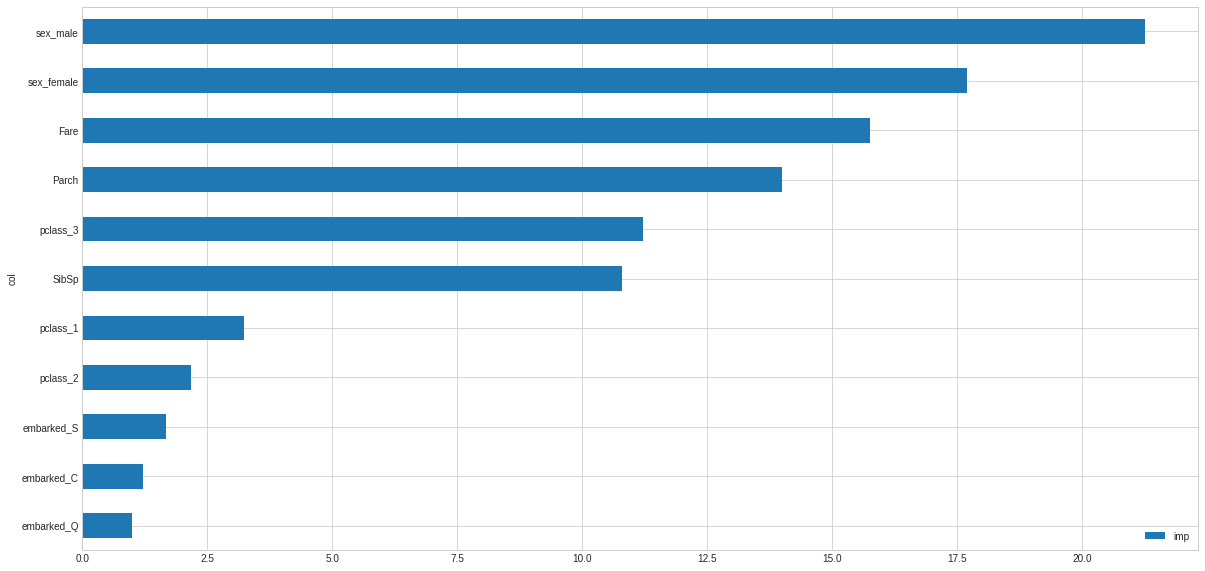

In [83]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

In [84]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [85]:
# We need our test dataframe to look like this one
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [86]:

# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [87]:
# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [88]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [89]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [90]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns])

In [91]:

# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [92]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [93]:
# What does our submission have to look like?
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [95]:
 #Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [96]:
# How does our submission dataframe look?
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [97]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [99]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('/home/jcolewrld/titanic/catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!
